# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import r2_score

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((8000, 28, 28), (8000,), (2000, 28, 28), (2000,))

In [4]:
#print the unique values in Y_train
print(np.unique(Y_train))


[0 1 2 3 4 5 6 7 8 9]


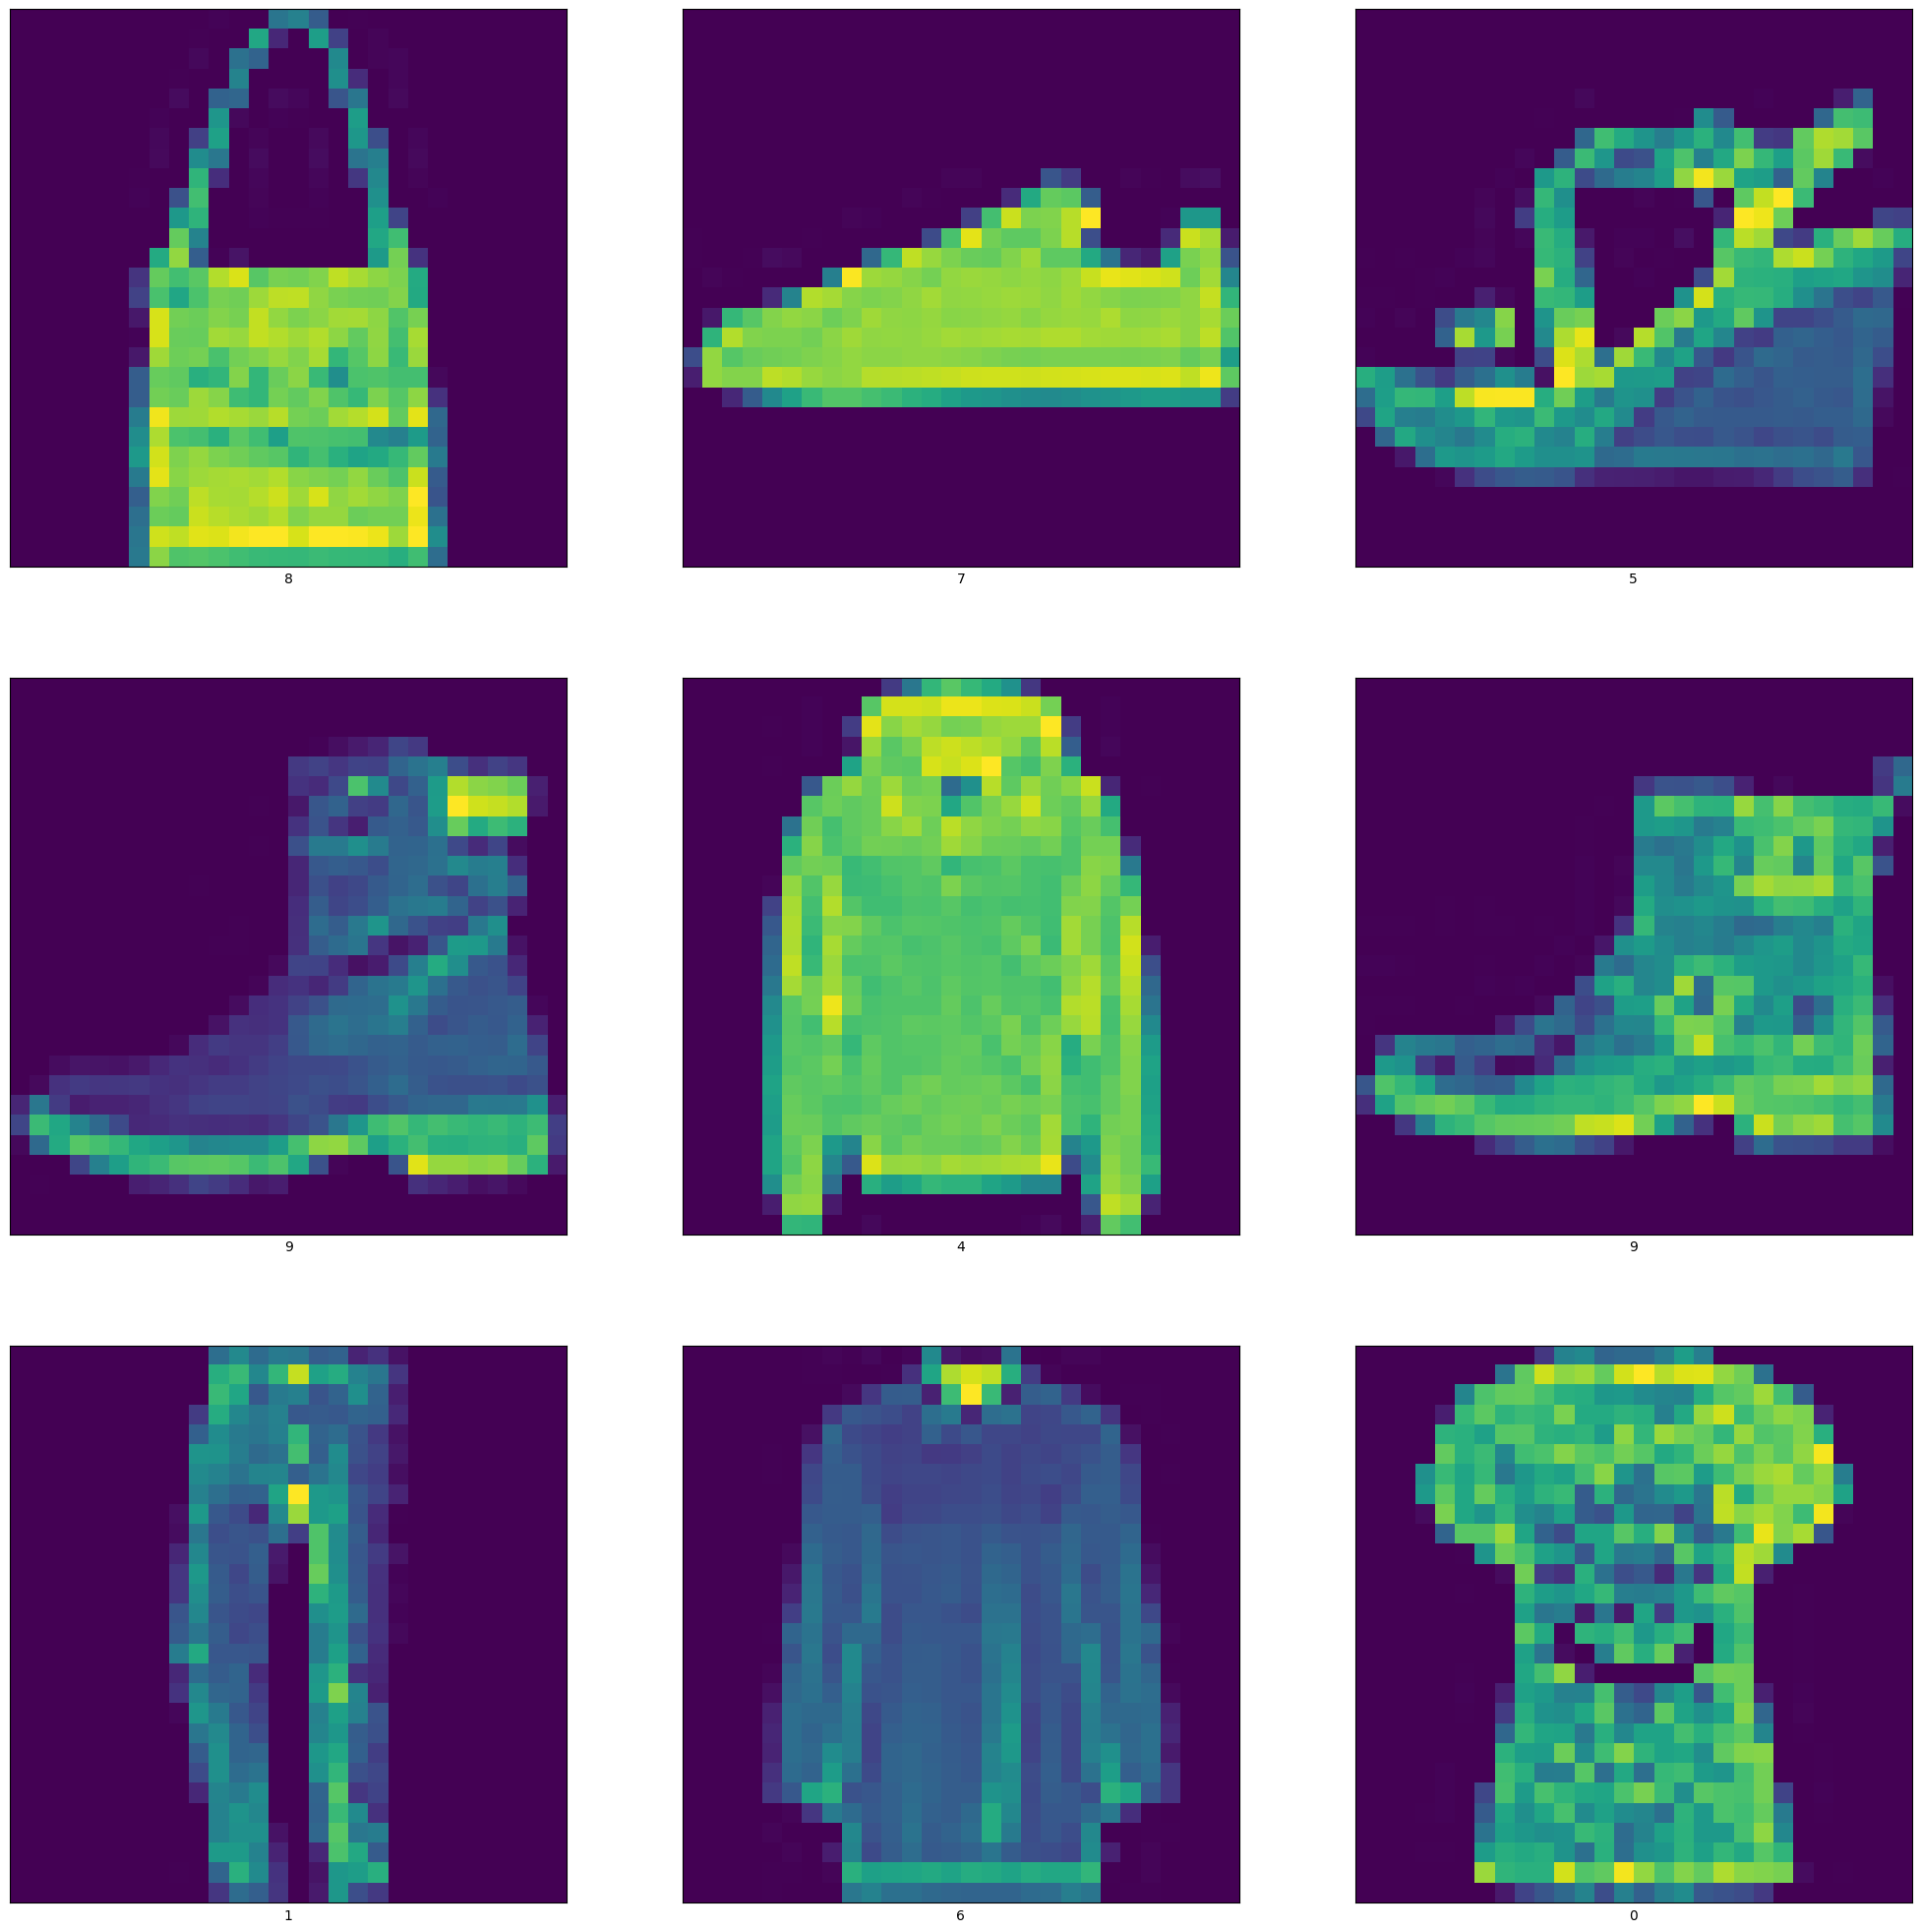

In [5]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  #edit2__add_label_here_
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(Y_train[i])
plt.show()
  


###These number denotes the respective object
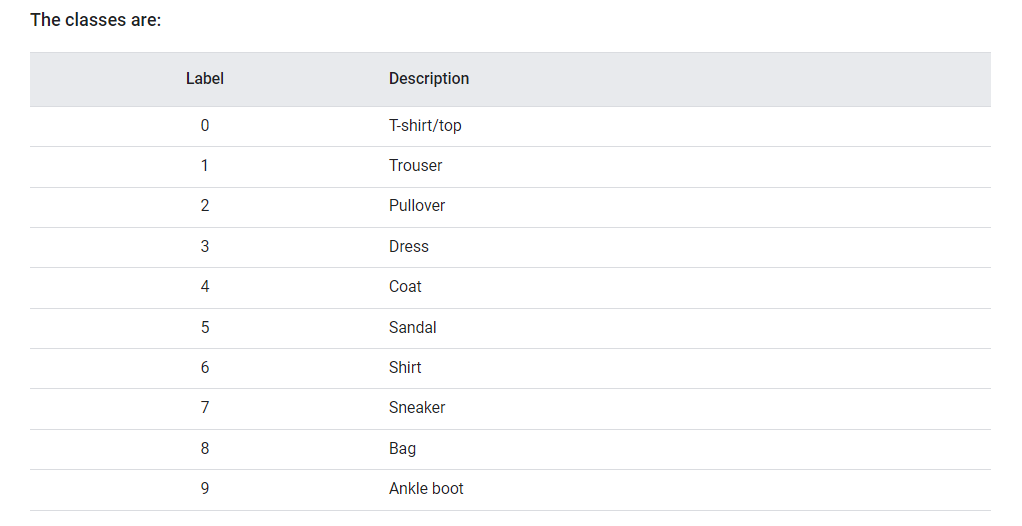

In [6]:
# Find the count of each type of class
for i in range(10):
  print(i,np.count_nonzero(Y_train == i))

0 806
1 778
2 783
3 809
4 815
5 812
6 784
7 821
8 793
9 799


In [7]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]


In [8]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
                  loss = SparseCategoricalCrossentropy()
                  ,metrics=['accuracy'])

In [9]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [10]:
""" 
[objective] Write the answer here: 101, 770
"""

' \n[objective] Write the answer here: 101, 770\n'

In [11]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train,epochs=25, validation_split=0.2)

Epoch 1/25
200/200 [==============================] - 3s 10ms/step - loss: 26.4924 - accuracy: 0.3748 - val_loss: 1.7825 - val_accuracy: 0.4469
Epoch 2/25
200/200 [==============================] - 2s 10ms/step - loss: 1.5843 - accuracy: 0.4669 - val_loss: 1.6063 - val_accuracy: 0.4719
Epoch 3/25
200/200 [==============================] - 2s 11ms/step - loss: 1.2998 - accuracy: 0.5442 - val_loss: 1.2825 - val_accuracy: 0.5394
Epoch 4/25
200/200 [==============================] - 2s 8ms/step - loss: 1.1127 - accuracy: 0.5775 - val_loss: 1.1955 - val_accuracy: 0.5781
Epoch 5/25
200/200 [==============================] - 2s 9ms/step - loss: 1.0393 - accuracy: 0.6031 - val_loss: 1.2108 - val_accuracy: 0.6062
Epoch 6/25
200/200 [==============================] - 1s 6ms/step - loss: 0.9801 - accuracy: 0.6150 - val_loss: 1.1454 - val_accuracy: 0.6137
Epoch 7/25
200/200 [==============================] - 1s 7ms/step - loss: 0.9257 - accuracy: 0.6398 - val_loss: 1.1144 - val_accuracy: 0.6219
Ep

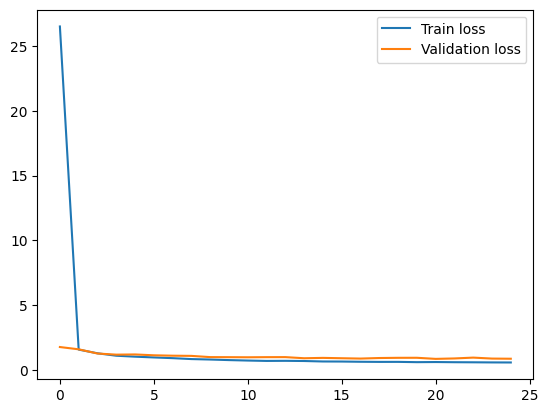

In [12]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [13]:
"""
[Under 100 words] Write your answer here: As the number of epochs increase, the losses reduce and the values reach closer and closer to the expected result. Accuracy of the model increases.
Cross validation set is used to check the dataset for overfitting. An overfit curve passes through each point in the graph, but if a new dataset is introduced, then we might not be able predict the output with accuracy.
If the model did not work properly then the loss of cross-validation set would be enormous. Therefore the graph shows, the model is on the right track.

"""

'\n[Under 100 words] Write your answer here: As the number of epochs increase, the losses reduce and the values reach closer and closer to the expected result. Accuracy of the model increases.\nCross validation set is used to check the dataset for overfitting. An overfit curve passes through each point in the graph, but if a new dataset is introduced, then we might not be able predict the output with accuracy.\nIf the model did not work properly then the loss of cross-validation set would be enormous. Therefore the graph shows, the model is on the right track.\n\n'

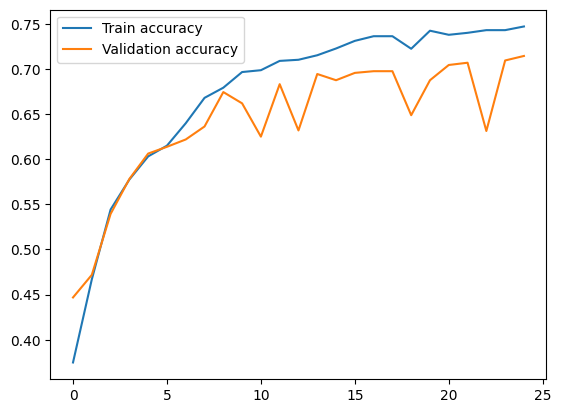

In [14]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [15]:
"""
[Under 100 words] Write your answer here: Similarly as the no of epochs increase, loss decreases, therefore accuracy increases. Accuracy of training set is greater than validation set
as the model is trained on the training set, but the increase in accuracy of cross validation set as well indicates that the model is working correctly. 

"""

'\n[Under 100 words] Write your answer here: Similarly as the no of epochs increase, loss decreases, therefore accuracy increases. Accuracy of training set is greater than validation set\nas the model is trained on the training set, but the increase in accuracy of cross validation set as well indicates that the model is working correctly. \n\n'

In [22]:
#Checking the prediction

Y_predicted = model.predict(X_train)

250/250 [==============================] - 1s 5ms/step


In [23]:
predictions = []
for i in Y_predicted:
  predictions.append(np.argmax(i))
Y_predicted = np.array(predictions)

In [21]:
Y_train.shape

(8000,)

In [24]:

# Calculate the R2score for the test data
r2_score(Y_train,Y_predicted)


0.6895284495874852

In [25]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [28]:
# print the shape of kernel of other layers as well
for i in range(3):
  print(model.layers[i].kernel.shape) 

AttributeError: ignored

In [29]:
# Does that satisfied the matrix multiplication math discussed earlier